In [1]:
pip install tensorflow

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [4]:
IMG_SIZE = 150
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Training data
train_generator = train_datagen.flow_from_directory(
    "training_set",       # ✅ correct folder name
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="training"
)

# Validation data
val_generator = train_datagen.flow_from_directory(
    "training_set",       # ✅ same folder, using validation split
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation"
)

# Test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    "test_set",           # ✅ correct folder name
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary"
)


Found 6400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [5]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()


C:\Users\user1\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


C:\Users\user1\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 275s 1s/step - accuracy: 0.5345 - loss: 0.6926 - val_accuracy: 0.5387 - val_loss: 0.6840
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 196s 727ms/step - accuracy: 0.5841 - loss: 0.6764 - val_accuracy: 0.6137 - val_loss: 0.6518
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.6189 - loss: 0.6575 - val_accuracy: 0.6600 - val_loss: 0.6189
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 156s 777ms/step - accuracy: 0.6347 - loss: 0.6376 - val_accuracy: 0.6744 - val_loss: 0.6138
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 182s 912ms/step - accuracy: 0.6475 - loss: 0.6262 - val_accuracy: 0.6319 - val_loss: 0.6369
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 166s 830ms/step - accuracy: 0.6837 - loss: 0.6003 - val_accuracy: 0.7056 - val_loss: 0.5651
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 161s 805ms/step - accuracy: 0.7105 - loss: 0.5730 - val_accuracy: 0.7075 - val_loss: 0.5540
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 137s 684ms/step - accuracy: 0.7281 - loss:

In [ ]:
loss, acc = model.evaluate(test_generator)
print(f"✅ Test Accuracy: {acc*100:.2f}%")


63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 496ms/step - accuracy: 0.7695 - loss: 0.4829
✅ Test Accuracy: 76.95%


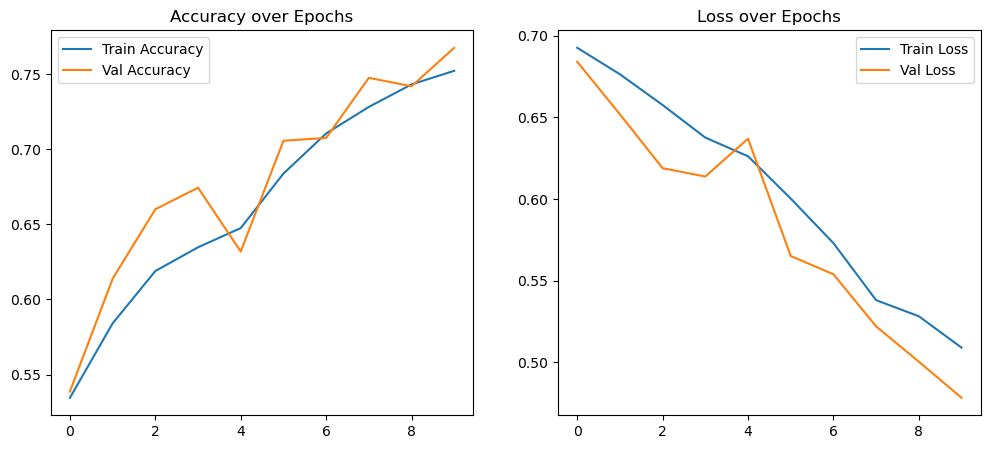

In [10]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.title("Accuracy over Epochs")

# Loss
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss over Epochs")

plt.show()


In [14]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

sample_img = "single_prediction/cat_or_dog_1.jpg"  
img = load_img(sample_img, target_size=(IMG_SIZE, IMG_SIZE))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("🐶 Prediction: Dog")
else:
    print("🐱 Prediction: Cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
🐶 Prediction: Dog


In [13]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

sample_img = "single_prediction/cat_or_dog_2.jpg"  
img = load_img(sample_img, target_size=(IMG_SIZE, IMG_SIZE))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("🐶 Prediction: Dog")
else:
    print("🐱 Prediction: Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
🐱 Prediction: Cat
